In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [40]:


import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='AnkhvfcIxMkbXzY0uUxCB74O2Szq4GEhlUxTaJWdPJeK',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'waterqualitymodel-donotdelete-pr-06tlz1t4obkjg2'
object_key = 'water_potability.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [41]:

x = data.drop("Potability", axis=1)
y = data["Potability"]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

imputer.fit(x_train)

x_train_imputed = imputer.transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [44]:
param_grid = {
    'max_depth': [3, 5, 15, 31, 71, 51, 101],
    'min_samples_split': [3, 5, 7, 13, 15, 26, 37 ,51, 101],
    'min_samples_leaf': [13, 23, 41, 67, 75, 79, 81, 83, 150]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, error_score='raise')

In [45]:
grid_search.fit(x_train_imputed, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 15, 31, 71, 51, 101],
                         'min_samples_leaf': [13, 23, 41, 67, 75, 79, 81, 83,
                                              150],
                         'min_samples_split': [3, 5, 7, 13, 15, 26, 37, 51,
                                               101]})

In [46]:
grid_search.best_score_

best_dt = grid_search.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=79, min_samples_split=3)

In [47]:
y_pred = best_dt.predict(x_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6478658536585366


In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(cm)

Confusion Matrix:

[[345  67]
 [164  80]]


In [49]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       412
           1       0.54      0.33      0.41       244

    accuracy                           0.65       656
   macro avg       0.61      0.58      0.58       656
weighted avg       0.63      0.65      0.62       656



In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}\t Mean Absolute Error: {mae:.4f}\t Root Mean Squared Error:{rmse:.4f}\t R2 Score:{r2:.4f}')



Mean Squared Error: 0.3521	 Mean Absolute Error: 0.3521	 Root Mean Squared Error:0.5934	 R2 Score:-0.5074


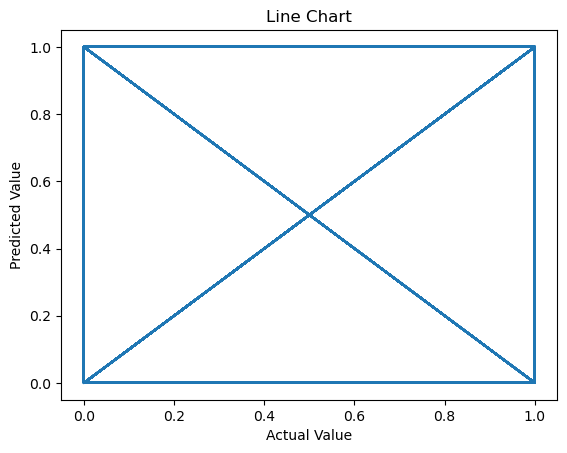

In [51]:
import matplotlib.pyplot as plt

plt.plot(y_test,y_pred)
plt.title('Line Chart')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [52]:
print("Decision Tree\n")
print(f"Accuracy:{accuracy}\n\nConfusion Matrix:{cm}\n\nClassification Report:\n{report}")

Decision Tree

Accuracy:0.6478658536585366

Confusion Matrix:[[345  67]
 [164  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       412
           1       0.54      0.33      0.41       244

    accuracy                           0.65       656
   macro avg       0.61      0.58      0.58       656
weighted avg       0.63      0.65      0.62       656



In [53]:
!pip install ibm_watson_machine_learning

In [54]:
from ibm_watson_machine_learning import APIClient

In [55]:
PROJECT_ID = 'a4b3e49b-7d4c-47f5-ad8e-3b1cd7f97c05'
API_KEY = '9KCEHHF6PQI6ADTeoecRqjtf1LtrtH8u3faUkjfAxFyE'
LOCATION = 'https://eu-de.ml.cloud.ibm.com'

wml_credentials={
    "url":LOCATION,
    "apikey":API_KEY
}
client=APIClient(wml_credentials)

In [57]:
# wml_client.set.default_space('628fb92c-37ab-448c-a2e8-ba8fe7594dc9') 
# wml_client.set.default_project(PROJECT_ID)

def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [34]:
wml_client.set.default_space('628fb92c-37ab-448c-a2e8-ba8fe7594dc9') 

'SUCCESS'

In [35]:

sofware_spec_uid = wml_client.software_specifications.get_id_by_name("runtime-22.2-py3.10")

metadata = {
            wml_client.repository.ModelMetaNames.NAME: 'water quality model model',
            wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.1',
            wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}
published_model = wml_client.repository.store_model(
    model=best_dt,
    meta_props=metadata)


In [36]:
import json

published_model_uid = wml_client.repository.get_model_id(published_model)
model_details = wml_client.repository.get_details(published_model_uid)
print(json.dumps(model_details, indent=2))

{
  "entity": {
    "hybrid_pipeline_software_specs": [],
    "software_spec": {
      "id": "b56101f1-309d-549b-a849-eaa63f77b2fb",
      "name": "runtime-22.2-py3.10"
    },
    "type": "scikit-learn_1.1"
  },
  "metadata": {
    "created_at": "2023-05-24T11:40:17.781Z",
    "id": "f53b4bbf-bb08-4227-a109-b4528730aa90",
    "modified_at": "2023-05-24T11:40:20.497Z",
    "name": "water quality model model",
    "owner": "IBMid-664004U2UW",
    "resource_key": "691a5bc0-9bee-4aff-bb98-b5f92fdcd4d6",
    "space_id": "628fb92c-37ab-448c-a2e8-ba8fe7594dc9"
  },
  "system": {
    "warnings": []
  }
}


In [37]:
models_details = wml_client.repository.list_models()

------------------------------------  -------------------------  ------------------------  ----------------  ----------  ----------------
ID                                    NAME                       CREATED                   TYPE              SPEC_STATE  SPEC_REPLACEMENT
f53b4bbf-bb08-4227-a109-b4528730aa90  water quality model model  2023-05-24T11:40:17.002Z  scikit-learn_1.1  supported
b4b74a86-4c99-46da-bf1d-bb5308667453  water quality model model  2023-05-24T11:39:33.002Z  scikit-learn_1.1  supported
------------------------------------  -------------------------  ------------------------  ----------------  ----------  ----------------


In [58]:
space_uid=guid_from_space_name(client,"WaterQualityPrediction")
print("space_uid="+space_uid)

space_uid=628fb92c-37ab-448c-a2e8-ba8fe7594dc9


In [59]:
client.set.default_space(space_uid)

'SUCCESS'

In [60]:
client.software_specifications.list()

----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                          ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  not_provided
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  not_provided
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  create-unsupported  pytorch-onnx_rt22

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,not_provided,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,not_provided,
5,scikit-learn_0.20-py3.6,09c5a1d0-9c1e-4473-a344-eb7b665ff687,base,unsupported,runtime-22.2-py3.10
6,spark-mllib_3.0-scala_2.12,09f4cff0-90a7-5899-b9ed-1ef348aebdee,base,unsupported,
7,pytorch-onnx_rt22.1-py3.9,0b848dd4-e681-5599-be41-b5f6fccc6471,base,create-unsupported,pytorch-onnx_rt22.2-py3.10
8,ai-function_0.1-py3.6,0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda,base,unsupported,runtime-22.2-py3.10
9,shiny-r3.6,0e6e79df-875e-4f24-8ae9-62dcc2148306,base,not_provided,


In [61]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.2-py3.10")

In [62]:
software_spec_uid

'b56101f1-309d-549b-a849-eaa63f77b2fb'

In [65]:
model_details=client.repository.store_model(model=best_dt,meta_props={
client.repository.ModelMetaNames.NAME:"water_potability",
client.repository.ModelMetaNames.TYPE:"scikit-learn_1.1",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                           )
model_id=client.repository.get_model_id(model_details)

In [66]:
model_id

'ffba1c00-dc05-418a-8418-064b8b567d6a'